<a href="https://colab.research.google.com/github/Ferrariagustinpablo/DataScienceprojects/blob/main/LEGO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. </p>

<p> In this project, I play the role of Data Analyst at a toy maker company. The firm's product manager asks to explore and analyse LEGO public dataset (https://rebrickable.com/downloads/) and try to answer topics and questions defined in a product engineering meeting. </p>


# Instructions to the Data Analyst.

1. Exploring Colors: Count number of colors available.

2. Exploring Colors: What are the 10 most used colors?

3. Exploring Colors: Explore transparent vs non-transparent colors ratio throught the years.

4. Explore lego sets: Number of sets and number of parts over the years.

5. Explore lego themes: Which are the themes with mosts sets?

6. Explore lego themes: What percentage of all sets ever released were Star Wars themed?

7. Explore lego themes: In the last 20 years, what theme was the most popular? (in terms of number of sets released that year)?

8. Explore lego themes: Describe how many sets of theme 'truck', 'car', 'race' are there, and the percentage of total. Which 5 colors are the most common in this topic?


# Importing libraries and dataset from kaggle API

Due to daily changes in dataset in https://rebrickable.com/downloads/ 
In Kaggle there is a dataset of LEGO from beginning of 2020.

I'll start importing packages and the files.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [4]:
# Choose a the kaggle.json file downloaded from Kaggle.
from google.colab import files
files.upload()

# Create a kaggle file and put kaggle.json in it.
!mkdir -p ~/kaggle
!cp kaggle.json ~/.kaggle/

# Hide API account key.
!chmod 600 /root/.kaggle/kaggle.json

# kaggle datasets 
!kaggle datasets download -d hapahacks1/lego-database-2020

Saving kaggle.json to kaggle (1).json
100% 4.57M/4.57M [00:00<00:00, 43.2MB/s]



In [5]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('lego-database-2020.zip', 'r') as zipObj:
   # Unzip
   zipObj.extractall()

## Dataset relationships on https://rebrickable.com/downloads/

In most of this notebook I'll analyse the questions with merged dataset of inventory as 'left'. Filtering every set, theme, product or id, to the items that are currently in inventory.

After this notebook I create a report with PowerBI and contrast some conclusions with a less restrictive dataset.

Next image is provided by rebrickable and shows relationships between tables.

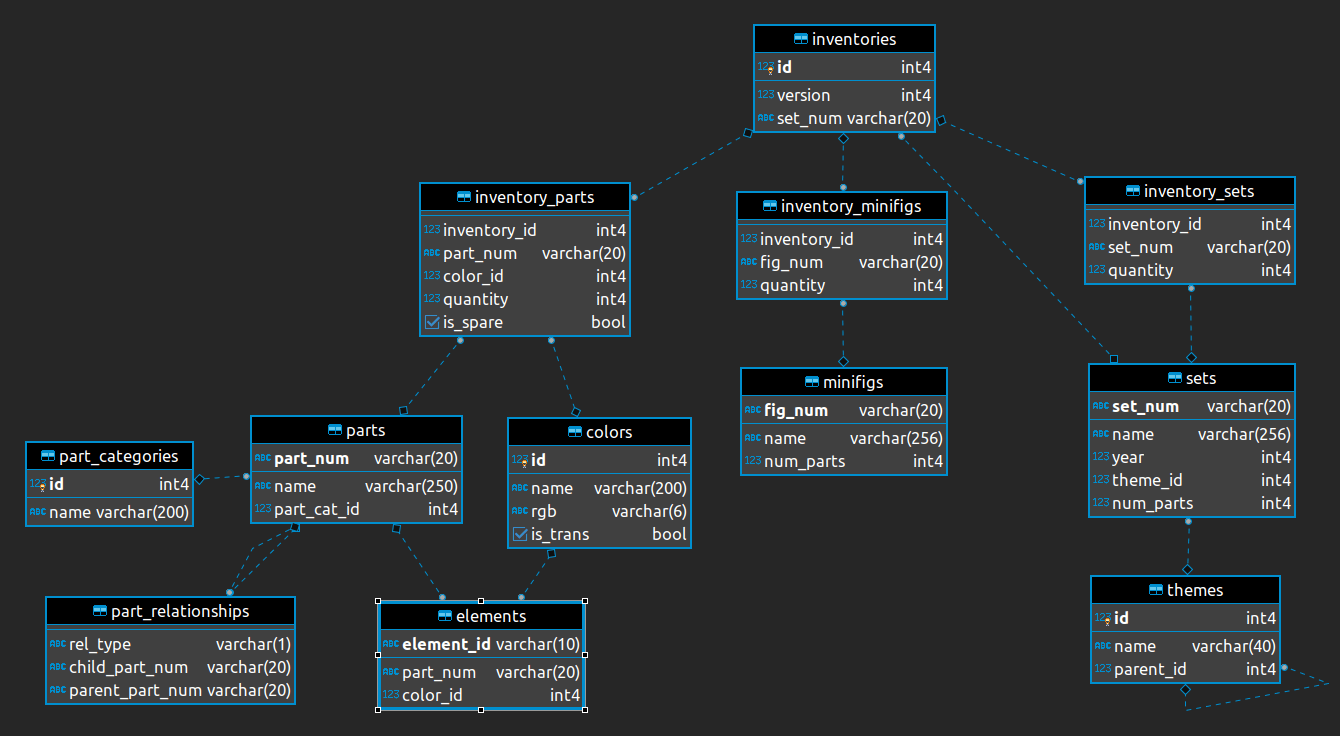

# 1) Exploring Colors: Count number of colors available.

## a) Count numbers of colors ever created.

In [6]:
# We need to import colors dataset to count unique colors available.
colors = pd.read_csv('colors.csv')

# Let's print shape and head
print(colors.shape)
colors.head()

(184, 4)


,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [7]:
colors.drop(0, axis=0, inplace=True)

In [8]:
# Check column data types
print('____________________Data types information____________________\n')
print(colors.info())

# Check for null values
print('____________________Null information____________________\n')
print(colors.isna().sum())

____________________Data types information____________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 183
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        183 non-null    int64 
 1   name      183 non-null    object
 2   rgb       183 non-null    object
 3   is_trans  183 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.1+ KB
None
____________________Null information____________________

id          0
name        0
rgb         0
is_trans    0
dtype: int64


### Control duplicate values

Shape of colors table is 183 rows and 4 columns, but there are only 162 unique colors counted by rgb and transparency.

This means there are duplicated values.

In [9]:
# Check duplicated
colors_duplicated = colors[colors[['rgb', 'is_trans']].duplicated()].shape[0]

print('There are {} duplicated colors in dataset'.format(colors_duplicated))

There are 21 duplicated colors in dataset


### Answer a) question

Because we cannot use .unique() method on a DataFrame of columns rgb and is_trans I quickly concatenate both string and check its length.

In [10]:
colors['rgb_trans'] = colors['rgb'] + ' ' + colors['is_trans']
unique_colors = colors['rgb_trans'].unique()
len(unique_colors)

162

In conclusion there are 162 unique colors created by LEGO according to this dataset.

## b) Besides knowing all available colors in their dataset, it is better to analyse how many of them are being used at the moment.

It will be more useful for the product team to have the colors that LEGO is currently using.

If old created colors were droped from the market, it means they weren't being sold as expected.

In [11]:
# Merge today's inventory with color ids.
inventory_parts = pd.read_csv('inventory_parts.csv')

# Let's print shape and head
print(inventory_parts.shape)
inventory_parts.head()

(815847, 5)


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [12]:
# Left merge inventory/colors on color_id columns
inv_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left', suffixes=('_inv','_colors'))
inv_colors.head()

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans,rgb_trans
0,1,48379c01,72,1,f,72.0,Dark Bluish Gray,6C6E68,f,6C6E68 f
1,1,48395,7,1,f,7.0,Light Gray,9BA19D,f,9BA19D f
2,1,mcsport6,25,1,f,25.0,Orange,FE8A18,f,FE8A18 f
3,1,paddle,0,1,f,0.0,Black,05131D,f,05131D f
4,3,11816pr0005,78,1,f,78.0,Light Flesh,F6D7B3,f,F6D7B3 f


In [13]:
unique_inv_colors = inv_colors['rgb_trans'].unique()
print('Number of colors according to unique rgb and trans:', len(unique_inv_colors))

print('Number of colors according to ids', inv_colors['id'].unique().shape[0])

Number of colors according to unique rgb and trans: 157
Number of colors according to ids 170


Again in dataset there are more 'id' rows than actual colors calculated with unique rgbs and transparency. 

There are 157 colors beings used by the toy maker.

## c) What colors are not being used at the moment?



In [14]:
not_used_colors = np.setdiff1d(unique_colors.astype(str), unique_inv_colors.astype(str))
not_used_colors

array(['0057A6 f', '006400 f', '4B0082 f', '583927 t', '8B0000 f',
       '8E5597 f'], dtype='<U8')

In [15]:
print('There are {} colors not being produced:'.format(len(not_used_colors)))

# Create a boolean mask to filter color dataset and give name, rgb and transparency
# for every color not available in inventory the moment.
bool_mask = colors['rgb_trans'].isin(not_used_colors)

# Dataset of name, rgb and transparency for every color not available in
# inventory the moment.
not_used_colors = colors[bool_mask][['name', 'rgb', 'is_trans']].reset_index(drop=True).drop_duplicates(subset=['rgb', 'is_trans'])
not_used_colors

There are 6 colors not being produced:


,name,rgb,is_trans
0,Reddish Lilac,8E5597,f
1,Modulex Tile Blue,0057A6,f
2,Modulex Foil Dark Green,006400,f
4,Modulex Foil Violet,4B0082,f
5,Modulex Foil Red,8B0000,f
6,Trans-Brown Opal,583927,t


# 2) Exploring Colors: What are the 10 most used colors?

We will answer the question by counting the frequency of colors used in toy parts.

In [16]:
# Subset index colors that have the most lego parts
most_used_rgb_trans = inv_colors.rgb_trans.value_counts().iloc[:10].index

# Subset inv_colors table
ten_most_used_colors = inv_colors[inv_colors.rgb_trans.isin(most_used_rgb_trans)][['name', 'rgb', 'is_trans']] \
              .drop_duplicates(subset=['rgb', 'is_trans']).reset_index(drop=True)
              # Also drop incomplete duplicates and reset_index
              


# Display result table:
ten_most_used_colors

,name,rgb,is_trans
0,Dark Bluish Gray,6C6E68,f
1,Light Gray,9BA19D,f
2,Black,05131D,f
3,White,FFFFFF,f
4,Reddish Brown,582A12,f
5,Blue,0055BF,f
6,Red,C91A09,f
7,Yellow,F2CD37,f
8,Light Bluish Gray,A0A5A9,f
9,Tan,E4CD9E,f


### Showing best colors on image

In [17]:
# Add a # symbol before rgb for plt understand the hex code
ten_most_used_colors['one'] = 1
ten_most_used_colors['hash_rgb'] = "#" + ten_most_used_colors['rgb']

In [18]:
ten_most_used_colors.to_csv('most_used_colors.csv')

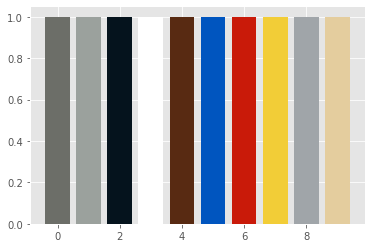

In [19]:
for i in range(len(ten_most_used_colors)):
  plt.bar(x=i, height=ten_most_used_colors['one'][i], data=ten_most_used_colors, color=ten_most_used_colors['hash_rgb'][i])

plt.show()

# 3) Exploring Colors: Explore transparent vs non-transparent colors ratio throught the years.

I would start by importing sets table that contains the name of the sets and the created years. We then have to merge to inventories table and then inventory_parts and colors (The last two are already merged and assigned in inv_colors) 

In [21]:
# Import sets.csv
sets = pd.read_csv('sets.csv')

# Import inventories.csv
inventories = pd.read_csv('inventories.csv')

# Let's print shapes and heads of sets
print('sets shape:', sets.shape)
display(sets.head())

print('\n inventories shape:', inventories.shape)
display(inventories.head())


sets shape: (15666, 5)


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12



 inventories shape: (15990, 3)


,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [22]:
# Left merge sets/inventories on color_id columns
sets_inv = sets.merge(inventories, on='set_num', how='left')
sets_inv.head()

,set_num,name,year,theme_id,num_parts,id,version
0,001-1,Gears,1965,1,43,24696,1
1,0011-2,Town Mini-Figures,1978,84,12,5087,1
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,2216,1
3,0012-1,Space Mini-Figures,1979,143,12,1414,1
4,0013-1,Space Mini-Figures,1979,143,12,4609,1


In [23]:
# Left merge sets/inventories on color_id columns
merged = sets_inv.merge(inv_colors, left_on='id', right_on='inventory_id', how='left', suffixes=('_setsinv','_invcol'))
print(merged.shape)
merged.head()

(817515, 17)


,set_num,name_setsinv,year,theme_id,num_parts,id_setsinv,version,inventory_id,part_num,color_id,quantity,is_spare,id_invcol,name_invcol,rgb,is_trans,rgb_trans
0,001-1,Gears,1965,1,43,24696,1,24696.0,132a,7.0,4.0,f,7.0,Light Gray,9BA19D,f,9BA19D f
1,001-1,Gears,1965,1,43,24696,1,24696.0,3020,15.0,4.0,f,15.0,White,FFFFFF,f,FFFFFF f
2,001-1,Gears,1965,1,43,24696,1,24696.0,3062c,15.0,1.0,f,15.0,White,FFFFFF,f,FFFFFF f
3,001-1,Gears,1965,1,43,24696,1,24696.0,3404bc01,15.0,4.0,f,15.0,White,FFFFFF,f,FFFFFF f
4,001-1,Gears,1965,1,43,24696,1,24696.0,36,7.0,4.0,f,7.0,Light Gray,9BA19D,f,9BA19D f


In [24]:
# Let's drop some columns we won't need for analysis
merged.drop(axis=1, labels=['id_setsinv', 'version', 'inventory_id', 'color_id', 'id_invcol'], inplace=True)
merged.head()

,set_num,name_setsinv,year,theme_id,num_parts,part_num,quantity,is_spare,name_invcol,rgb,is_trans,rgb_trans
0,001-1,Gears,1965,1,43,132a,4.0,f,Light Gray,9BA19D,f,9BA19D f
1,001-1,Gears,1965,1,43,3020,4.0,f,White,FFFFFF,f,FFFFFF f
2,001-1,Gears,1965,1,43,3062c,1.0,f,White,FFFFFF,f,FFFFFF f
3,001-1,Gears,1965,1,43,3404bc01,4.0,f,White,FFFFFF,f,FFFFFF f
4,001-1,Gears,1965,1,43,36,4.0,f,Light Gray,9BA19D,f,9BA19D f


In [25]:
# Check categories on is_trans column
merged.is_trans.unique()

array(['f', nan, 't'], dtype=object)

First of all we would need to clean and remap categories of is_trans column

In [26]:
# Replacing nan strins for np.NaN values and dropping them. 
merged_cleaned = merged.replace('nan', np.nan).dropna(axis=0)

# Remap categories from f and t to True or False
map = {'f': 0, 't': 1}
merged_cleaned['is_trans'] = merged_cleaned.is_trans.map(map)

# Change column to type int
merged_cleaned.astype({'is_trans': int}).dtypes

# Display head again
merged_cleaned.head()

,set_num,name_setsinv,year,theme_id,num_parts,part_num,quantity,is_spare,name_invcol,rgb,is_trans,rgb_trans
0,001-1,Gears,1965,1,43,132a,4.0,f,Light Gray,9BA19D,0,9BA19D f
1,001-1,Gears,1965,1,43,3020,4.0,f,White,FFFFFF,0,FFFFFF f
2,001-1,Gears,1965,1,43,3062c,1.0,f,White,FFFFFF,0,FFFFFF f
3,001-1,Gears,1965,1,43,3404bc01,4.0,f,White,FFFFFF,0,FFFFFF f
4,001-1,Gears,1965,1,43,36,4.0,f,Light Gray,9BA19D,0,9BA19D f


In [27]:
# What years are described in the dataset?
print(np.sort(merged_cleaned['year'].unique()))

# How many years?
print('Total years in dataset:', len(merged_cleaned['year'].unique()))

[1949 1950 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Total years in dataset: 70


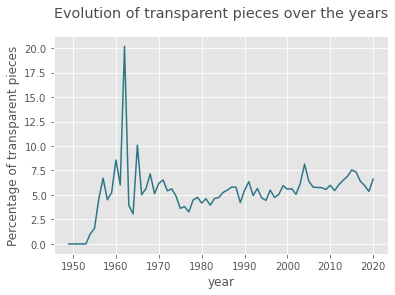

In [30]:
# I will need to group by years and sum True value in is_trans column
transparency_over_years = merged_cleaned.groupby('year').mean()['is_trans']*100

# Show evolution of transparent pieces.
transparency_over_years.plot(kind='line', color='#2E7687')
plt.ylabel('Percentage of transparent pieces')
plt.title('Evolution of transparent pieces over the years', y=1.06, alpha=0.7)
plt.show()


# 4) Explore lego sets: Number of sets and number of parts over the years.

## a) Number of parts over the years

Using dataset of only items that are in inventory:

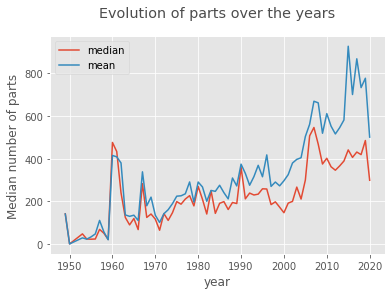

In [31]:
# Group by and collect the evolution of part numbers.
# I use both median and mean as statistic parameters.
parts_over_years = merged_cleaned.groupby('year').agg([np.median, np.mean])['num_parts']


# Show evolution of mean number of parts
parts_over_years.plot(kind='line')
plt.ylabel('Median number of parts')
plt.title('Evolution of parts over the years', y=1.06, alpha=0.7)
plt.show()

Parts of items ever created in sets dataset.

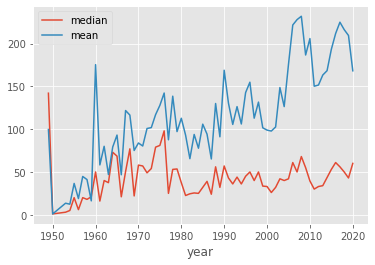

In [32]:
# In sets dataset:

sets.groupby('year').agg([np.median, np.mean])['num_parts'].plot(kind='line')

It seems LEGO made their toys more complex over time. This tendency may have changed the last year.

There is an interesting difference between median and mean which gives indication that there might be some sets with large amounts of parts.

## b) Number of sets over the years.

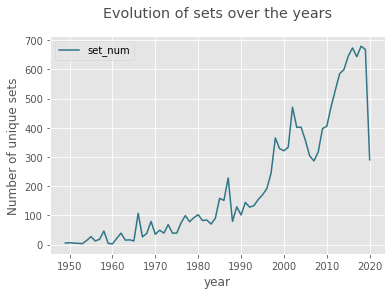

In [ ]:
# Let's group by year and aggregate with a function that counts unique set ids
sets_over_years = merged_cleaned[['set_num','year']].groupby('year').agg(lambda x: len(x.unique()))


# Show sets over the years
sets_over_years.plot(kind='line', color='#2E7687')
plt.ylabel('Number of unique sets')
plt.title('Evolution of sets over the years', y=1.06, alpha=0.7)
plt.show()

Variety of LEGOs until 2019 seemed to have been increasing exponentially over the years. 
Year 2020 experienced an oustanding fall on quantity of LEGO sets. With a drop of more than half, maybe because of COVID-19 autrage or because dataset has incomplete information, I wouldn't suggest to analyse the information with the year 2020. Dropping it would increase realiability of the analysis.

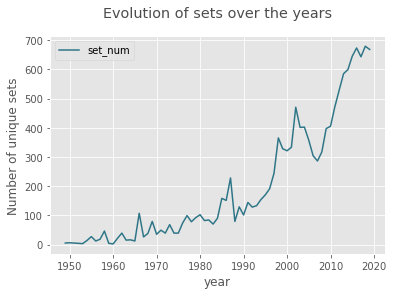

In [33]:
# Drop the year 2020
merged_cleaned = merged_cleaned[merged_cleaned.year<2020]

# Let's group by year and aggregate with a function that counts unique set ids
sets_over_years = merged_cleaned[['set_num','year']].groupby('year').agg(lambda x: len(x.unique()))


# Show sets over the years
sets_over_years.plot(kind='line', color='#2E7687')
plt.ylabel('Number of unique sets')
plt.title('Evolution of sets over the years', y=1.06, alpha=0.7)
plt.show()

# 5) Explore lego themes: Which are the themes with mosts sets?

In [34]:
# Import inventories.csv
themes = pd.read_csv('themes.csv')

# Let's print shapes and heads of sets
print('sets shape:', themes.shape)
display(themes.head())

sets shape: (655, 3)


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [35]:
# Let's merge with themes dataset
lego = merged_cleaned.merge(themes, left_on='theme_id', right_on='id', how='left')
print(lego.shape)
lego.head()

(794693, 15)


,set_num,name_setsinv,year,theme_id,num_parts,part_num,quantity,is_spare,name_invcol,rgb,is_trans,rgb_trans,id,name,parent_id
0,001-1,Gears,1965,1,43,132a,4.0,f,Light Gray,9BA19D,0,9BA19D f,1,Technic,NaN
1,001-1,Gears,1965,1,43,3020,4.0,f,White,FFFFFF,0,FFFFFF f,1,Technic,NaN
2,001-1,Gears,1965,1,43,3062c,1.0,f,White,FFFFFF,0,FFFFFF f,1,Technic,NaN
3,001-1,Gears,1965,1,43,3404bc01,4.0,f,White,FFFFFF,0,FFFFFF f,1,Technic,NaN
4,001-1,Gears,1965,1,43,36,4.0,f,Light Gray,9BA19D,0,9BA19D f,1,Technic,NaN


In [36]:
# We select 10 themes with higher number of sets. 
theme_ids = lego.groupby('theme_id').agg(lambda x: len(x.unique())).sort_values('set_num', ascending=False).head(10).index

# With best theme ids, we subset themes table
themes_with_most_sets = themes[themes['id'].isin(theme_ids)][['id','name']].reset_index(drop=True)
themes_with_most_sets

,id,name
0,158,Star Wars
1,220,City
2,371,Supplemental
3,435,Ninjago
4,443,Service Packs
5,494,Friends
6,505,Basic Set
7,516,Duplo and Explore
8,632,Town
9,672,Creator 3-in-1


# 6) Explore lego themes: What percentage of all sets ever released were Star Wars themed?

## a) I'll check Star Wars products as a % of total sets by year **existing as a product now in inventory**. 

In [37]:
# I create a new column is_starwars 1 if is theme star wars, 0 if not.
# Gives ids that name starts with Star Wars
star_wars_ids = themes[themes.name.str.contains('Star Wars')].index

# Create a map of all ids that started with Star Wars
sw_map = dict(zip(star_wars_ids,np.ones(len(star_wars_ids))))
lego['is_starwars'] = lego.theme_id.map(sw_map)
lego['is_starwars'].replace(np.nan, 0, inplace=True)
lego.is_starwars.unique()

array([0., 1.])

In [46]:
# Let's % of starwars items current in inventory:
print('{:.2f}%'.format(lego.is_starwars.mean()*100))

9.40%


year
2015    13.976232
2016    11.478745
2017    11.802692
2018    11.458658
2019    10.976136
Name: is_starwars, dtype: float64

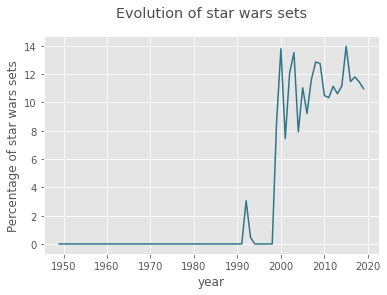

In [47]:
star_wars_perc = lego.groupby('year').mean()['is_starwars']*100

# Display percentages for the last 5 years.
display(star_wars_perc.iloc[-5:])

# Show sets over the years
star_wars_perc.plot(kind='line', color='#2E7687')
plt.ylabel('Percentage of star wars sets')
plt.title('Evolution of star wars sets', y=1.06, alpha=0.7)
plt.show()

# Change themes for POWER BI presentations

In [159]:
# Import inventories.csv
themes = pd.read_csv('themes.csv')
# Import sets.csv
sets = pd.read_csv('sets.csv')


In [139]:
ts_merged = pd.merge(themes, sets, left_on='id', right_on='theme_id', how='right', suffixes=['_themes', '_sets'])
ts_merged

,id,name_themes,parent_id,set_num,name_sets,year,theme_id,num_parts
0,1,Technic,NaN,001-1,Gears,1965,1,43
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985,1,191
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985,1,120
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986,1,39
...,...,...,...,...,...,...,...,...
15661,264,Indiana Jones,NaN,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,0
15662,430,Pirates,425.0,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70
15663,430,Pirates,425.0,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215
15664,430,Pirates,425.0,LLCA30-1,Pirate Ship Diorama (LLCA Ambassador Pass Excl...,2006,430,127


In [140]:
ts_merged[ts_merged.name_themes.str.contains('Star Wars')]

,id,name_themes,parent_id,set_num,name_sets,year,theme_id,num_parts
6321,158,Star Wars,NaN,11912-1,LEGO Star Wars: Build Your Own Adventure,2016,158,73
6322,158,Star Wars,NaN,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
6323,158,Star Wars,NaN,20006-1,Clone Turbo Tank - Mini,2008,158,64
6324,158,Star Wars,NaN,20007-1,Republic Attack Cruiser - Mini,2009,158,84
6325,158,Star Wars,NaN,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...,...,...,...
15057,225,Star Wars,217.0,9509-7,"Advent Calendar 2012, Star Wars (Day 6) - Batt...",2012,225,5
15058,225,Star Wars,217.0,9509-8,"Advent Calendar 2012, Star Wars (Day 7) - Nabo...",2012,225,16
15059,225,Star Wars,217.0,9509-9,"Advent Calendar 2012, Star Wars (Day 8) - Vult...",2012,225,9
15644,261,Star Wars,258.0,9748-1,Droid Developer Kit,1999,261,658


In [141]:
ts_merged = ts_merged.set_index('id')
star_wars_ids = ts_merged[ts_merged.name_themes.str.startswith('Star Wars')].index
star_wars_ids = np.unique(star_wars_ids)
star_wars_ids

In [144]:
ts_merged.loc[star_wars_ids,'name_themes'] = 'Star Wars'
ts_merged['is_starwars'] = ts_merged['name_themes']
map = {'Star Wars': 1}
ts_merged['is_starwars'] = ts_merged['is_starwars'].map(map)
ts_merged = ts_merged.fillna(0)
ts_merged['is_starwars'].unique()

array([0., 1.])

In [158]:
ts_merged.groupby('year')['is_starwars'].mean().tail(10)

year
2011    0.103321
2012    0.106036
2013    0.091317
2014    0.095109
2015    0.082353
2016    0.083110
2017    0.080977
2018    0.084788
2019    0.073406
2020    0.053254
Name: is_starwars, dtype: float64

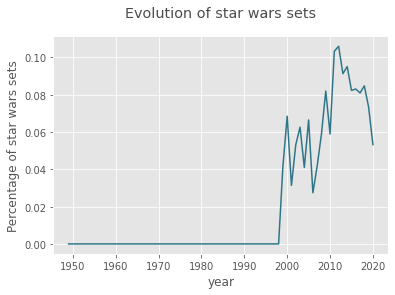

In [157]:
# Show sets over the years
ts_merged.groupby('year')['is_starwars'].mean().plot(kind='line', color='#2E7687')
plt.ylabel('Percentage of star wars sets')
plt.title('Evolution of star wars sets', y=1.06, alpha=0.7)
plt.show()

# 7) Explore lego themes: In the last 20 years, what theme was the most popular? (in terms of number of sets released that year)?

In [ ]:
# Compute most created theme in each year.
theme_ids = lego.groupby('year').agg(pd.Series.mode)[['theme_id', 'name']]

# Show last 20 rows (years)
theme_ids.tail(20)

,theme_id,name
year,,
2000,158,Star Wars
2001,135,Life On Mars
2002,158,Star Wars
2003,158,Star Wars
2004,37,Basic Set
2005,158,Star Wars
2006,37,Basic Set
2007,158,Star Wars
2008,158,Star Wars


There are only four years from the last 20, that star wars wasn't the theme with most created sets. This shows the importance of this licensed brand.

# 8) Explore lego themes: Describe how many sets of theme 'truck', 'car', 'race' are there, and the percentage of total. Which 5 colors are the most common in this topic?

## a) Describe how many sets of theme 'truck', 'car', 'race' are there, and the percentage of total

In [ ]:
# Select set ids which name contains car, truck or race.
set_num_ctr = lego[lego['name_setsinv'].str.contains('car|truck|race')]['set_num'].unique()
set_num_ctr

array(['10022-1', '10025-1', '1202-1', '1382-1', '1385-1', '1386-1',
       '2585-1', '30461-1', '308-1', '309-1', '312-2', '313-2', '3194-1',
       '3195-1', '3196-1', '353-1', '3714-1', '3900-1', '40176-1',
       '40243-1', '40285-1', '40328-1', '40352-1', '41124-1', '44003-1',
       '4485-1', '4659597-1', '5002112-1', '518-1', '519-1', '520-1',
       '520-2', '520-3', '520-4', '520-5', '520-6', '520-7', '520-8',
       '521-1', '561610-1', '603-1', '6833-1', '6868-1', '6966-2',
       '6967-2', '70910-1', '70913-1', '71002-2', '71023-18', '71023-6',
       '7131-1', '7171-1', '7216-1', '7216-2', '7216-3', '7217-1',
       '7217-2', '7305-1', '75012-1', '75171-1', '75258-1', '75523-1',
       '7554-1', '7574-19', '7575-10', '7575-3', '75970-1', '76042-1',
       '76054-1', '76089-1', '7786-1', '7891-1', '7904-13', '7904-15',
       '7910-1', '7911-1', '7912-1', '7962-1', '8070-1', '850-1', '857-1',
       '8634-1', '8953-1', '9675-1'], dtype=object)

In [ ]:
# create a dictionary 
map_sets = dict(zip(set_num_ctr,np.ones(len(set_num_ctr))))

# Crerate a new column if id contains car, truck or race would have a value of 1.
lego['is_ctr'] = lego.set_num.map(map_sets)
lego['is_ctr'].replace(np.nan, 0, inplace=True)
lego.is_ctr.unique()

array([0., 1.])

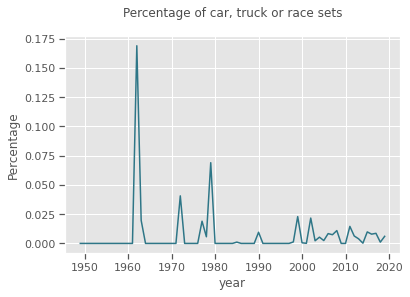

In [ ]:
ctr_by_year = lego.groupby('year').mean()['is_ctr']

# Show sets over the years
ctr_by_year.plot(kind='line', color='#2E7687')
plt.ylabel('Percentage')
plt.title('Percentage of car, truck or race sets', y=1.06, alpha=0.7)
plt.show()

It seems LEGO has developed very few car, truck or race sets.

## b) Which 5 colors are the most predominant in car, truck and race sets?